https://uncoolai.com/exponential-smoothing-for-time-series-forecasting/

## Simple Exponential Smoothing
Simple Exponential Smoothing, is a time series forecasting method for univariate data which does not consider the trend and seasonality in the input data while forecasting. The prediction is just the weighted sum of past observations.
It requires a single parameter, called alpha (𝛼), also called the smoothing factor.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
train_data = df.iloc[:108]
test_data = df.iloc[108:]

Plot the data

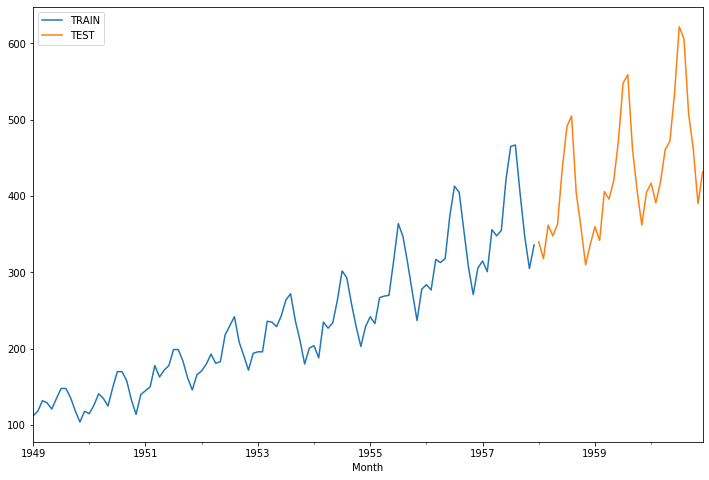

In [3]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

From the above plot, it is clearly visible that the Airline passengers data has upward trend and seasonility(approx 12 Months). We can also get the Seasonality and Trend using seasonal_decompose module in Python

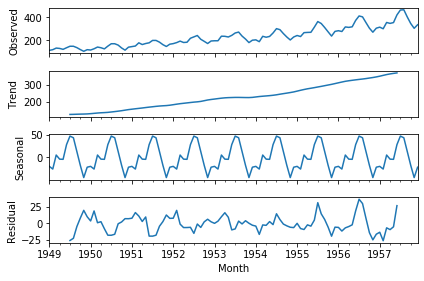

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(train_data['#Passengers']).plot();

implement simple smoothing in Python via the SimpleExpSmoothing Statsmodels class

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

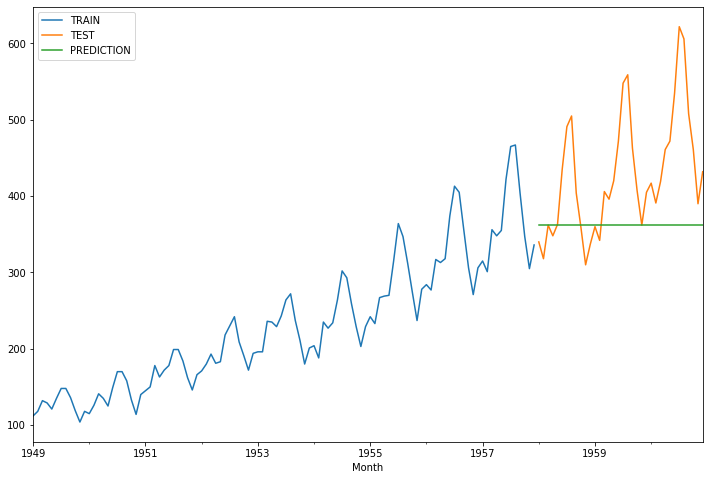

In [6]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [7]:
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error is ",rms_error)

RMS Error is  102.76000445873636




As stated earlier, the SimpleExponentialModel does not consider the trend and seasonality. It will just take the weighted average of past data and forecast that average for all testing data. That’s why you can observe a straight line as the prediction. This model is not much useful for us.

## Double Exponential Smoothing

Double Exponential Smoothing is an extension to Simple Exponential Smoothing that explicitly adds support for trends in the univariate time series. In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (𝛽).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

implement Double Exponential Smoothing in Python via the ExponentialSmoothing Statsmodels class. Here I am not choosing the parameters 𝛼 and 𝛽

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

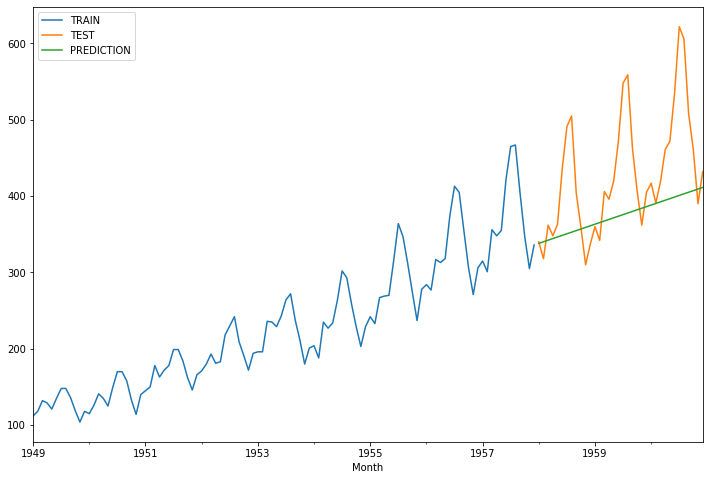

In [9]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [10]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error for DES is ",rms_error)

RMS Error for DES is  87.725113444245


As stated earlier, Double Exponential Smoothing will consider only the trend and ignore the seasonality. Since the data has upward trend, the prediction is a straight line with positive Slope.

## Triple Exponential Smoothing

Triple Exponential Smoothing is an extension of Double Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (𝛾
) that controls the influence on the seasonal component.

to ensure that the seasonality is modeled correctly, the number of time steps in a seasonal period (Period) must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period=12.

Hyperparameters:

    Alpha: Smoothing factor for the level.
    Beta: Smoothing factor for the trend.
    Gamma: Smoothing factor for the seasonality.
    Trend Type: Additive or multiplicative.
    Seasonality Type: Additive or multiplicative.
    Period: Time steps in seasonal period.

implement Triple Exponential Smoothing in Python via the ExponentialSmoothing Statsmodels class. Here I am not choosing the parameters 𝛼, 𝛽 and 𝛾. The model will use default values.

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(36).rename('TES Forecast')

/Users/robincole/.pyenv/versions/3.7.5/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


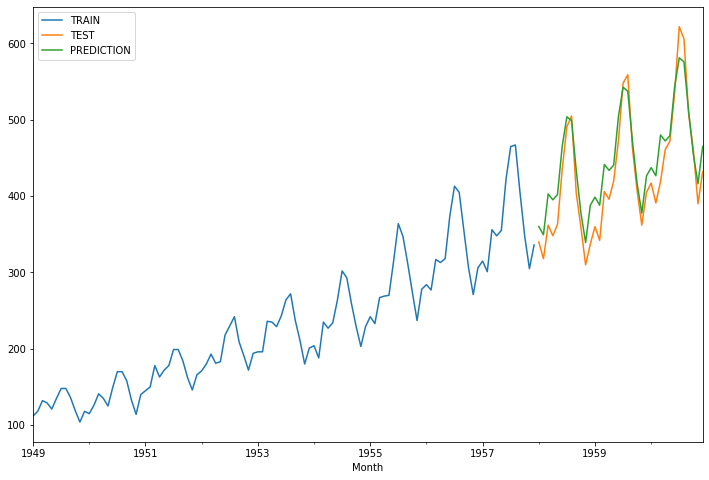

In [12]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [13]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error for TES is ",rms_error)

RMS Error for TES is  29.70690758441309


Since Triple Exponential Model is considering the trend and Seasonality, it is able to give very close forecasts. Even the RMS error also very less and improved a lot compared to SES & DES.